# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import cv2

2024-09-23 23:28:43.070091: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 23:28:43.070551: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 23:28:43.072966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 23:28:43.079216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 23:28:43.089080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7524 - loss: 0.7933 - val_accuracy: 0.9747 - val_loss: 0.0870
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9633 - loss: 0.1211 - val_accuracy: 0.9817 - val_loss: 0.0611
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9726 - loss: 0.0900 - val_accuracy: 0.9878 - val_loss: 0.0472
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9779 - loss: 0.0724 - val_accuracy: 0.9885 - val_loss: 0.0425
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9797 - loss: 0.0639 - val_accuracy: 0.9893 - val_loss: 0.0387
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9827 - loss: 0.0567 - val_accuracy: 0.9887 - val_loss: 0.0377
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9824 - loss: 0.0569 - val_accuracy: 0.9902 - val_loss: 0.0374
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9846 - loss: 0.0470 - val_accuracy: 0

## Evaluate the trained model

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.02598714642226696
Test accuracy: 0.9919000267982483


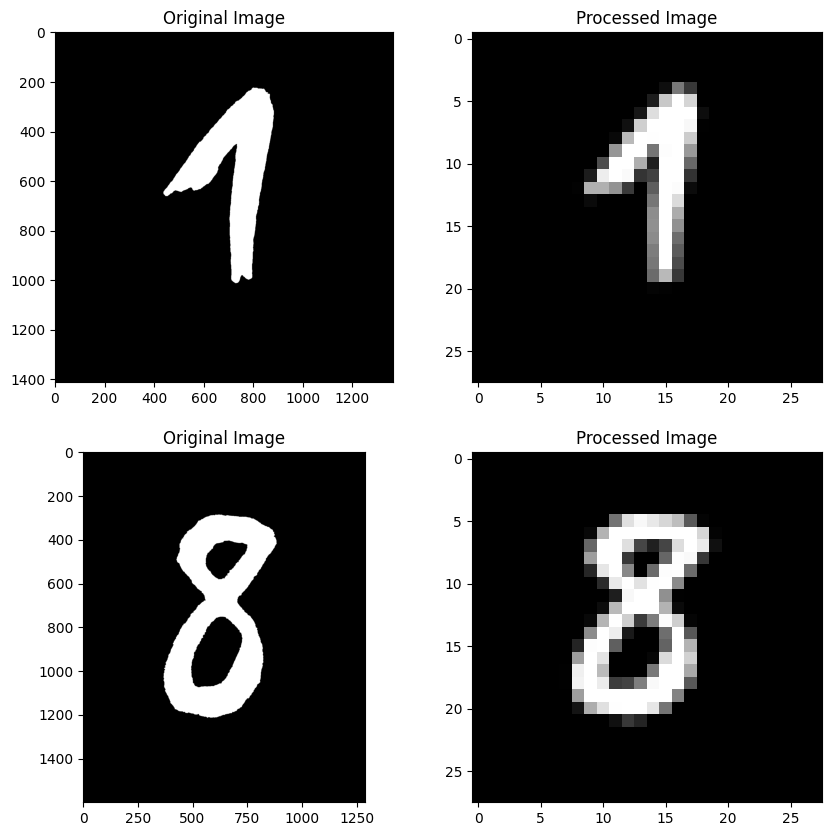

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


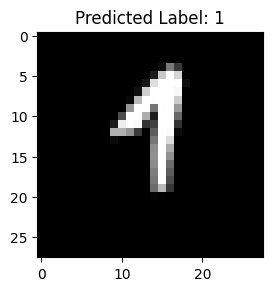

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


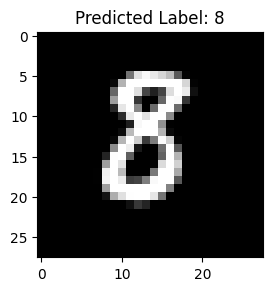

' predictions = model.predict(meus_numeros)\n\nplt.figure(figsize=(10, 10))\nfor i in range(25):\n    plt.subplot(5, 5, i + 1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(meus_numeros[i], cmap=plt.cm.binary)\n    plt.xlabel(np.argmax(predictions[i]))\nplt.show()\n '

In [7]:
#função para o tratamento da imagem a ser adicionada:
def process_image(image):
    
    # Apply binary threshold to convert the image to black and white
    _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    
    # Invert the image if needed (optional, depending on how you want to represent the data)
    image = cv2.bitwise_not(image)
    
    # Resize the image to 28x28 if it is not already in that shape
    image_resize = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Reshape the image to 28x28x1 (add channel dimension if needed)
    image_resize = np.reshape(image_resize, (28, 28, 1))

    return image, image_resize

image1 = cv2.imread('/home/larissa/Desktop/UFC/Visão/Labs/lab_cnn_deteccao_num/meu_um.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/home/larissa/Desktop/UFC/Visão/Labs/lab_cnn_deteccao_num/meu_oito.jpeg', cv2.IMREAD_GRAYSCALE)

image1, image1_processed = process_image(image1)
image2, image2_processed = process_image(image2)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(image1_processed.reshape(28, 28), cmap='gray')
plt.title('Processed Image')
plt.subplot(2, 2, 3)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 4)
plt.imshow(image2_processed.reshape(28, 28), cmap='gray')
plt.title('Processed Image')
plt.show()

# Adicionando as imagens ao conjunto de teste
meus_numeros = []
meus_numeros.append(image1_processed)
meus_numeros.append(image2_processed)

for image in meus_numeros:
    predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()


""" predictions = model.predict(meus_numeros)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(meus_numeros[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
 """



